# <span style="color:red"> NSL Esercitazione 3 </span>
### <span style="color:pink">  Giacomo Boringhieri 13457A</span>

## <span style="color:blue">  Esercizio 4.1</span>

In questo esercizio ho studiato il **pricing delle opzioni** tramite simulazione Monte Carlo, utilizzando il modello di Black–Scholes come riferimento teorico.  
Un’opzione è un contratto che conferisce al possessore il diritto (ma non l’obbligo) di comprare (**call**) o vendere (**put**) un titolo a un prezzo prefissato \(K\) entro una scadenza \(T\).

Alla scadenza, i payoff sono:

$$
\text{Call} = \max(S(T) - K, 0), \qquad 
\text{Put} = \max(K - S(T), 0),
$$

dove \(S(T)\) è il prezzo del sottostante al tempo \(T\). Per riportare il valore al tempo iniziale, occorre scontarlo con il fattore esponenziale \(e^{-rT}\), che rappresenta il tasso di interesse privo di rischio.

---

### Modello per l’andamento del prezzo
Il prezzo dell’asset è stato modellato con un **moto browniano geometrico (GBM)**:

$$
S(t) = S(0)\,\exp\!\left[\left(r - \tfrac{\sigma^2}{2}\right)t + \sigma W_t\right],
$$

dove:
- \(r = 0.1\) è il tasso risk-free,
- \(\sigma = 0.25\) è la volatilità,
- \(W_t\) è un processo di Wiener standard con incrementi gaussiani \(W(t)\sim \mathcal{N}(0,t)\).

Per la stima ho usato \(10^5\) simulazioni totali, suddivise in 100 blocchi.

---

### Metodi di simulazione

1. **Campionamento diretto del prezzo finale**  
   Ho estratto direttamente \(S(T)\) dalla soluzione analitica del GBM:  
   $$
   S(T) = S_0 \exp\!\Big[\big(r - \tfrac{\sigma^2}{2}\big)T + \sigma z \sqrt{T}\Big], \qquad z \sim \mathcal{N}(0,1).
   $$
   Questo approccio è semplice e permette di stimare subito i payoff.

2. **Evoluzione discreta del percorso**  
   Ho diviso l’intervallo \([0,T]\) in \(N=100\) passi, aggiornando il prezzo con:  
   $$
   S_{t+\Delta t} = S_t \exp\!\Big[\big(r - \tfrac{\sigma^2}{2}\big)\Delta t + \sigma z \sqrt{\Delta t}\Big].
   $$
   Questa tecnica riproduce l’intera traiettoria del titolo e diventa necessaria per opzioni **path-dependent**, che dipendono dall’andamento del prezzo lungo il cammino e non solo dal valore finale.

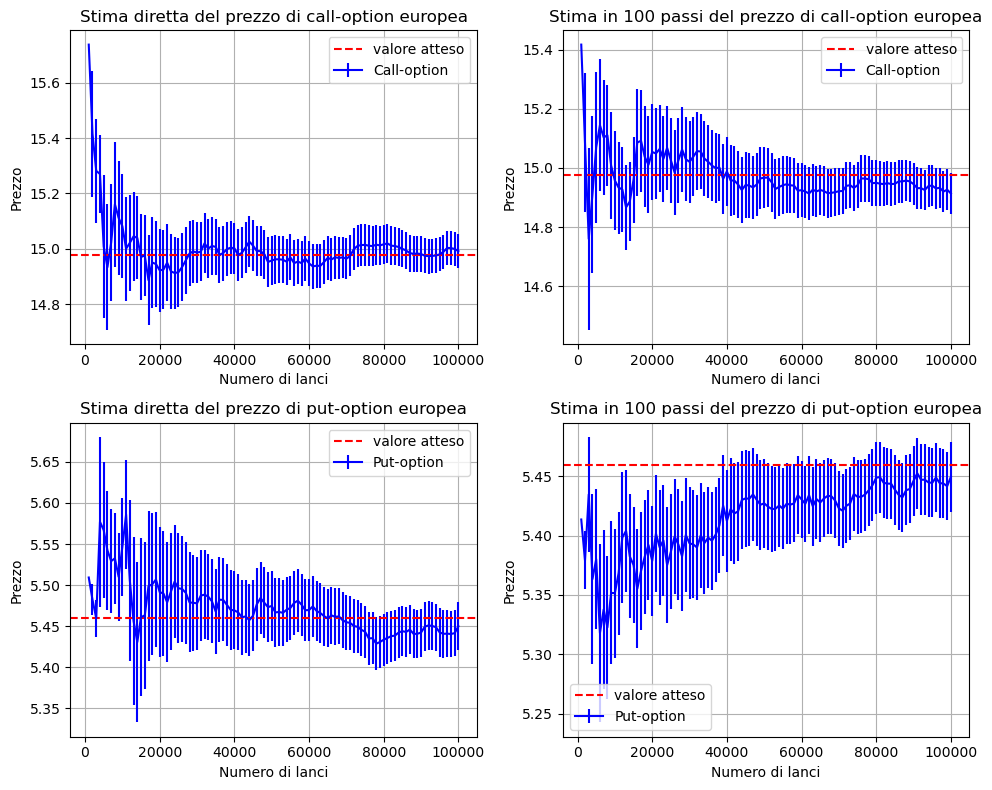

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

# Carico i dati dal file
data_call_dir = np.loadtxt("es1/data_call.dat")
data_put_dir = np.loadtxt("es1/data_put.dat")
data_call_discr = np.loadtxt("es1/data_step_call.dat")
data_put_discr = np.loadtxt("es1/data_step_put.dat")

# Estraggo le colonne di dati
x = data_call_dir[:, 0]   # Prima colonna: contiene il numero di blocchi (uso la stessa per tutti i plot)
y_call_dir = data_call_dir[:, 1]   # Terza colonna: prezzo dell'opzione
y_put_dir = data_put_dir[:, 1]   # Terza colonna: prezzo dell'opzione
err_call_dir = data_call_dir[:, 2] # Quarta colonna: errore (deviazione standard)
err_put_dir = data_put_dir[:, 2]
y_call_discr = data_call_discr[:, 1]   # Terza colonna: prezzo dell'opzione
y_put_discr = data_put_discr[:, 1]   # Terza colonna: prezzo dell'opzione
err_call_discr = data_call_discr[:, 2] # Quarta colonna: errore (deviazione standard)
err_put_discr = data_put_discr[:, 2]


# Creazione di una figura con 2 righe e 2 colonne
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot call (diretto)
axes[0,0].errorbar(x, y_call_dir, yerr=err_call_dir,label="Call-option",color='b')
axes[0,0].set_xlabel("Numero di lanci")
axes[0,0].set_ylabel("Prezzo")
axes[0,0].set_title("Stima diretta del prezzo di call-option europea")
axes[0,0].axhline(y=14.975790778311286, color='r', linestyle='--', label="valore atteso")
axes[0,0].legend()
axes[0,0].grid(True)

# Plot call (100 passi)
axes[0,1].errorbar(x, y_call_discr, yerr=err_call_discr,label="Call-option",color='b')
axes[0,1].set_xlabel("Numero di lanci")
axes[0,1].set_ylabel("Prezzo")
axes[0,1].set_title("Stima in 100 passi del prezzo di call-option europea")
axes[0,1].axhline(y=14.975790778311286, color='r', linestyle='--', label="valore atteso")
axes[0,1].legend()
axes[0,1].grid(True)

# Plot put (diretto)
axes[1,0].errorbar(x, y_put_dir, yerr=err_put_dir,label="Put-option",color='b')
axes[1,0].set_xlabel("Numero di lanci")
axes[1,0].set_ylabel("Prezzo")
axes[1,0].set_title("Stima diretta del prezzo di put-option europea")
axes[1,0].axhline(y=5.4595325819072364, color='r', linestyle='--', label="valore atteso")
axes[1,0].legend()
axes[1,0].grid(True)

# Plot call (100 passi)
axes[1,1].errorbar(x, y_put_discr, yerr=err_put_discr,label="Put-option",color='b')
axes[1,1].set_xlabel("Numero di lanci")
axes[1,1].set_ylabel("Prezzo")
axes[1,1].set_title("Stima in 100 passi del prezzo di put-option europea")
axes[1,1].axhline(y=5.4595325819072364, color='r', linestyle='--', label="valore atteso")
axes[1,1].legend()
axes[1,1].grid(True)


# Layout per evitare sovrapposizioni
plt.tight_layout()
plt.show()